# **Challenge of the Week - ML Workflow** 
---
## Case Study: Classifying Smokers vs Non Smokers

**Objective:**

In this challenge, you will work on a dataset that you saw during week 1 but this time with different aspect. Your goal is not only to make a prediction, it is to make a prediction with the best possible way. So you will be building, evaluating, and improving your model.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

Our problem would be to predict if a person is smoker or not based on all the other features in the dataset.

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models. We need from it train_test_split and LogisticRegression Functions

In [10]:
#Test Your Zaka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#To make the plots more buty import seaborn
import seaborn as sns
sns.set_style("white")

#### Read & visualize data
To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function. Print the head of your dataset.

In [3]:
#Test Your Zaka
df=pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

**Task:** how many rows & columns in our dataset

In [5]:
#Test Your Zaka
print("the number of coloumns are ", df.shape[1])
print("the number of rows are ", df.shape[0])

the number of coloumns are  7
the number of rows are  1338


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [6]:
#Test Your Zaka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#There is no missing data, there 3 object features: sex, smoker, and region

Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [8]:
#Test Your Zaka
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Data Imbalance Checking

First, let's see how many smokers vs non-smokers we have.

In [9]:
#Test Your Zaka
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

We have an imbalance that we will fix later.

Let's see how much each feature tells us about a person being  a smoker or not.
For each of your numerical features, plot the distribution for the smokers and the non smokers case. 

In [25]:
#The numerical features are: age, bmi, children, charges
non_smokers=df[(df['smoker']=='no')]
smokers=df[(df['smoker']=='yes')]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

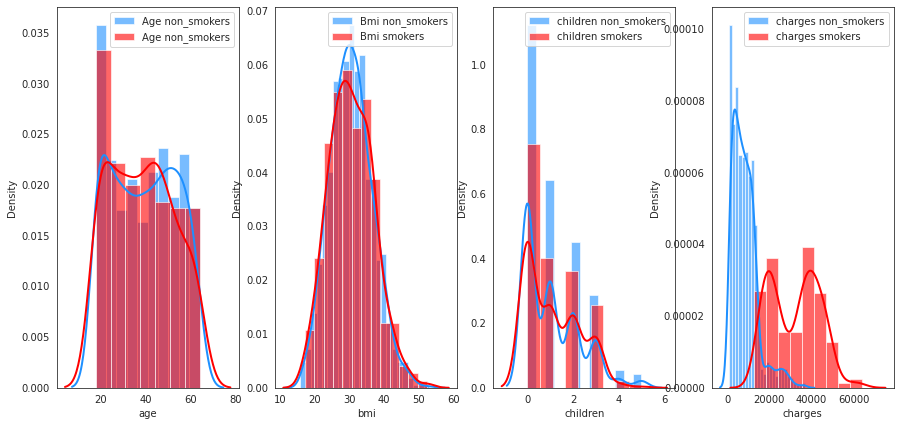

In [36]:
#Test Your Zaka
#Distrubution for non smoker color blue and smokers red for the numerical values age, bmi, childre, charges:
plt.figure(figsize=(15,7)) 
plt.subplot(141)
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(non_smokers['age'], color="dodgerblue", label="Age non_smokers", **kwargs)
sns.distplot(smokers['age'], color="r", label="Age non_smokers", **kwargs)
plt.legend()

plt.subplot(142) 
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(non_smokers['bmi'], color="dodgerblue", label="Bmi non_smokers", **kwargs)
sns.distplot(smokers['bmi'], color="r", label="Bmi smokers", **kwargs)
plt.legend()

plt.subplot(143) 
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(non_smokers['children'], color="dodgerblue", label="children non_smokers", **kwargs)
sns.distplot(smokers['children'], color="r", label="children smokers", **kwargs)
plt.legend()

plt.subplot(144) 
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(non_smokers['charges'], color="dodgerblue", label="charges non_smokers", **kwargs)
sns.distplot(smokers['charges'], color="r", label="charges smokers", **kwargs)
plt.legend()

WHat do you think is the feature that tells us the most about a person being smoker or not?

**["Charges" more features indicate the smoker and non smoker, because the distribution plot is different]**

Now let's see if the gender influences being a smoker or not.
<br>Hint: You can use crosstabbing and then plot distributions

In [46]:
#Test Your Zaka
sex_effects=pd.crosstab(df["sex"],df["smoker"], margins=True)
sex_effects

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


<Figure size 1080x504 with 0 Axes>

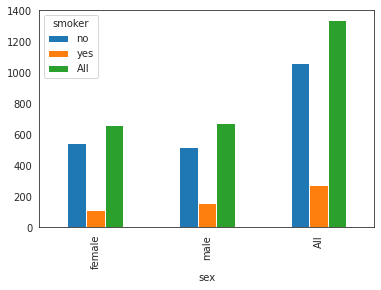

In [79]:
plt.figure(figsize=(15,7)) 
sex_effects.plot(kind='bar')

Do you think the gender has an effect on smoking according to your results?

**[No, from the previoues figure the number of the smokers and non-smokers in the both gender is almost equal]**

Do the same for the column 'region'

In [80]:
#Test Your Zaka
region=pd.crosstab(df["region"],df["smoker"], margins=True)
region

smoker,no,yes,All
region,,,
northeast,257,67,324
northwest,267,58,325
southeast,273,91,364
southwest,267,58,325
All,1064,274,1338


<Figure size 1080x504 with 0 Axes>

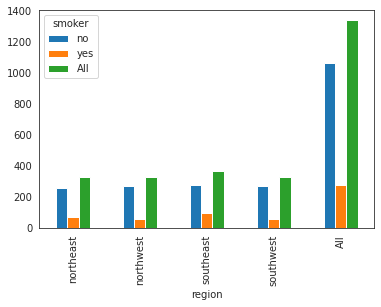

In [82]:
plt.figure(figsize=(15,7)) 
region.plot(kind='bar')

**[The region has NO effect, from the previoues figure the number of the smokers and non-smokers in the regiones is almost equal]**

## 3. Data Preprocessing
"Garbage in, garbage out". 

Data should be preprocessed and cleaned to get rid of noisy data. 
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



 Let's start by seeing if we have missing data.

In [85]:
#Test Your Zaka
df.isnull().sum(axis = 0) 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Drop rows with missing values, and make sure you have no nulls anymore.

In [86]:
#Test Your Zaka
#No null in the used DF

See the type of each of your columns

In [87]:
#Test Your Zaka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



In [89]:
#Test Your Zaka
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df.sex=le.fit_transform(df.sex)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


And now the smokers column

In [90]:
#Test Your Zaka
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df.smoker=le.fit_transform(df.smoker)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


And now the Region Column

In [91]:
#Test Your Zaka
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df.region=le.fit_transform(df.region)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [93]:
#check the type for features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


#### Normalization

Let's scale all the columns by dividing by the maximum

In [94]:
#Test Your Zaka
mx=df.max() 
df=df.divide(mx)

## 4. Model Training & Testing



#### Data splits

Before training, we need to split data into training (80%) & testing (20%), and fix the random_state parameter to 42 <br>Print the shapes of your training and testing data.

In [101]:
#Test Your Zaka
x = df.loc[:, df.columns != 'smoker'].values
y = df.iloc[:,-3].values  
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#### Logistic Regression Modeling


Define the logistic Regression model, and fit it on the training data

In [102]:
#Test Your Zaka
model = LogisticRegression()
model.fit(x_train,y_train)
print('Model trained!')

Model trained!


#### Evaluation

Evaluate your model on the testing data, and compute: Accuracy, Precision, Recall and F1 score

In [144]:
#Test Your Zaka
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)
print('Accurecy: %.3f' % accuracy)

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, labels=[1,2], average='micro')
print('Precision: %.3f' % precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)

Accurecy: 0.899
Precision: 0.886
Recall: 0.574
F-Measure: 0.697


Which metrics you think can be improved?

**[Recall]**

##5. Model Improvement

Now we will try to improve the model that we built.

####Handle data Imbalance

Plot a histogram that shows the numbers of smokers and non smokers

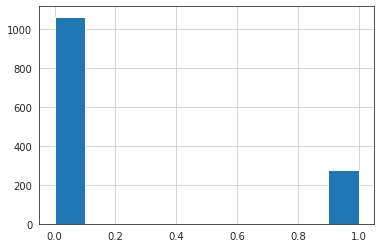

In [145]:
#Test Your Zaka
df['smoker'].hist()

We can see that we have a clearly imbalanced dataset. To handle it, we choose to do 2 steps:
* Oversampling the minority class with a factor of 0.5
* Undersampling the majority class to obtain the same number in the 2 classes
<br>
We do that by using the RandomOverSaampler and RandomUnderSampler from the imblearn library.

In [146]:
#Test Your Zaka
from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler(sampling_strategy= 0.5) 
xx, yy = over.fit_resample(x, y)

from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy=1)
x_new, y_new = under.fit_resample(xx, yy)


Plot a new histogram on the new data we have.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bcc58d250>]],
      dtype=object)

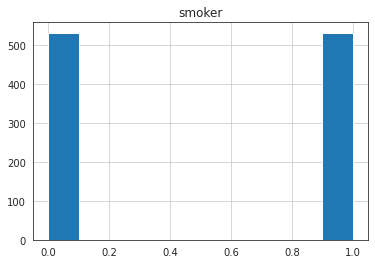

In [147]:
#Test Your Zaka
Balance=pd.DataFrame(data=y_new,columns=['smoker'])
Balance.hist()

Split the new data you obtained (80%, 20%), and build a Logistic Regression mode, and fit it on this data. Fix the random_state at 42

In [149]:
#Test Your Zaka

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

#model
model_1 = LogisticRegression()
model_1.fit(x_train_1,y_train_1)
print('Model trained!')

Model trained!


Asses your model on the testing data, and Compute the same metrics you computed before

In [153]:
#Test Your Zaka
y_pred_1=model_1.predict(x_test_1)

accuracy_1=accuracy_score(y_test_1, y_pred_1)
print('Accurecy: %.3f' % accuracy_1)

precision_1 = precision_score(y_test_1, y_pred_1)
print('Precision: %.3f' % precision_1)

recall_1 = recall_score(y_test_1, y_pred_1)
print('Recall: %.3f' % recall_1)

score_1 = f1_score(y_test_1, y_pred_1)
print('F-Measure: %.3f' % score_1)

Accurecy: 0.967
Precision: 0.936
Recall: 1.000
F-Measure: 0.967


We can see how much our scores got better when we balanced our dataset.

####Regularization with Hyperparameter Tuning

We will be tuning the hyperparameter C in the logistic regression model that we used. This hyperparameter represents regularization.
<br><img src="https://equatio-api.texthelp.com/svg/C%5C%20%3D%5C%20%5Cfrac%7B1%7D%7B%5Clambda%7D" alt="C equals 1 over lamda">

The possible values of C will be: [0.1, 1, 10, 100, 1000]

We will also know have to decide what type of regularization we will use: L1, or L2.

Since we have several parameters to tune, we will be doing what we call a GridSearch, to search for the best model having the best pair of hyperparameters.
We will be doing a 5 folds cross validation

Note: Specify the solver='liblinear' in your LogisticRegression model, and this is because other solvers do not support L1 regularization.

Print the best score and the best parameters

In [155]:
#Test Your Zaka
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LogisticRegression(solver='liblinear'), {'C': [0.1,1,10,100,1000]}, cv=5, return_train_score=False)
clf.fit(x_train_1, y_train_1)
clf.cv_results_

{'mean_fit_time': array([0.00204368, 0.0015142 , 0.0018981 , 0.00211654, 0.00220051]),
 'mean_score_time': array([0.00046282, 0.00038347, 0.00039692, 0.0003839 , 0.00037293]),
 'mean_test_score': array([0.95298246, 0.97061576, 0.97061576, 0.97767458, 0.98120399]),
 'param_C': masked_array(data=[0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}],
 'rank_test_score': array([5, 3, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.96491228, 0.97660819, 0.97660819, 0.97660819, 0.97660819]),
 'split1_test_score': array([0.94117647, 0.95882353, 0.95882353, 0.97647059, 0.98235294]),
 'split2_test_score': array([0.94117647, 0.97058824, 0.97058824, 0.97647059, 0.98235294]),
 'split3_test_score': array([0.95294118, 0.97058824, 0.96470588, 0.97647059, 0.97647059]),
 'split4_test_score': array([0.96470588, 0.97647059, 0.98235294, 0.98235294, 0.9

Let's assess the model's performance in general for the best specified hyperparameters using the same metrics we used earlier.

In [159]:
#Test Your Zaka
y_pred_2=clf.predict(x_test_1)

accuracy_2=accuracy_score(y_test_1, y_pred_2)
print('Accurecy: %.3f' % accuracy_2)

precision_2 = precision_score(y_test_1, y_pred_2)
print('Precision: %.3f' % precision_2)

recall_2 = recall_score(y_test_1, y_pred_2)
print('Recall: %.3f' % recall_2)

score_2 = f1_score(y_test_1, y_pred_2)
print('F-Measure: %.3f' % score_2)

Accurecy: 0.981
Precision: 0.962
Recall: 1.000
F-Measure: 0.981


We can see that the results improved compared to the last model we built.

####AdaBoost Classifier

Now, we will work on improving our model, but this time through using ensemble methods, and what we will use for today is Adaboost.

AdaBoost is a boosting ensemble method that relies on the boosting concepts that we learned about during the week. 
In Adaboost, each model is learning to correct the previous model's mistakes (misclassified examples). After that, each model will have a weight that depends on how well it performed on the training data. And after that, different results are aggregated based on weighted averaging.

Create an AdaBoostClassifier Model from sklearn library with n_estimators=10, and fit it on the training data you have.

In [164]:
#Test Your Zaka
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier(n_estimators= 10)
scores = cross_validate(model_3, x_new, y_new, cv=5, scoring=['accuracy','precision', 'recall', 'f1_macro'])

accuracy_3 = scores.get('test_accuracy').mean()
precision_3 = scores.get('test_precision').mean()
recall_3 = scores.get('test_recall').mean()
f1_3 = scores.get('test_f1_macro').mean()

print("Accuracy:", accuracy_3,
      "\nPrecision:",precision_3,
      "\nRecall:", recall_3,
      "\nF1 Score:", f1_3)

Accuracy: 0.9699264771016033 
Precision: 0.9564326341411855 
Recall: 0.9849585611003351 
F1 Score: 0.96991630005862


Asses the performance of your model on the testing data, and compute the same metrics we computed earlier.

In [180]:
#Test Your Zaka
model_3.fit(x_train_1, y_train_1)

y_pred_3=model_3.predict(x_test_1)

accuracy_3=accuracy_score(y_test_1, y_pred_3)
print('Accurecy: %.3f' % accuracy_3)

precision_3 = precision_score(y_test_1, y_pred_3)
print('Precision: %.3f' % precision_3)

recall_3 = recall_score(y_test_1, y_pred_3)
print('Recall: %.3f' % recall_3)

score_3 = f1_score(y_test_1, y_pred_3)
print('F-Measure: %.3f' % score_3)

Accurecy: 0.967
Precision: 0.970
Recall: 0.961
F-Measure: 0.966


**BONUS:** One thing you can try on your own, is to tune the Hyperparameters of the Adaboost algorithm, and build an even more powerful model :)

In [182]:
#By increase the number of n_estimators
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier(n_estimators= 1000)
scores = cross_validate(model_3, x_new, y_new, cv=5, scoring=['accuracy','precision', 'recall', 'f1_macro'])

accuracy_3 = scores.get('test_accuracy').mean()
precision_3 = scores.get('test_precision').mean()
recall_3 = scores.get('test_recall').mean()
f1_3 = scores.get('test_f1_macro').mean()

print("Accuracy:", accuracy_3,
      "\nPrecision:",precision_3,
      "\nRecall:", recall_3,
      "\nF1 Score:", f1_3)

Accuracy: 0.9746301709628842 
Precision: 0.9551763628588519 
Recall: 0.9962264150943396 
F1 Score: 0.9746121623546319
